[ 490. 1274. 1353. 1258. 1070.  866.  682.  536.  524.  330.  378.  379.
  368.  240.  307.  289.  284.  381.  360.  412.] [ 885. 1057. 1129.  976.  783.  637.  623.  596.  605.  459.  443.  395.
  361.  296.  327.  283.  301.  332.  301.  309.]
[ 0.  0.  1.  0.  0.  2.  5.  8. 14. 13.  8.  8.  3.  3.  0.  0.  0.  0.
  0.  0.] [  0.   0.   0.  21.  84. 131.  97. 108. 108.  92. 115.  89. 120. 105.
  97.  25.   0.   0.   0.   0.]


Text(0, 0.5, 'medium T ')

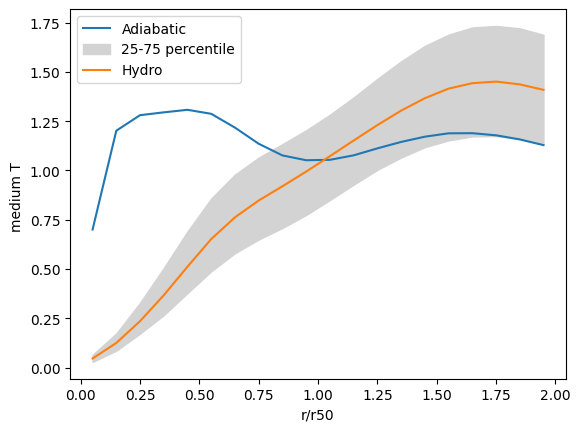

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H_13.hdf5",'r')
hdm=np.array(f['Ndm'])
hg=np.array(f['Ng'])
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H_13.hdf5",'r')
hdm_ad=np.array(f['Ndm'])
hg_ad=np.array(f['Ng'])
hg_T_ad=np.array(f['Ng_T'])
#hg_X_ad=np.array(f['Ng_Xray'])
#hg+=10**-15
#hdm_ad+=10**-15
f.close()
print(np.sum(hg_ad,axis=2)[0],np.sum(hdm,axis=2)[0])
bins=np.linspace(0,2,21)
hist=np.sum(hg_ad,axis=2)*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg,axis=2)*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')
print(hg[1000][0],hg_ad[1000][0])
ax.set_xlabel('r/r50')
ax.set_ylabel('medium T ')